<a href="https://colab.research.google.com/github/rafaelcostadefarias/Python_Financas/blob/main/ImportarDadosYahoo_%2B_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Script simples que exibe os preços de fechamento

In [2]:
!pip install yfinance --upgrade --no-cache-dir
!pip install fbprophet

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)


In [3]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from fbprophet import Prophet

Importa yahoo finance e sobreescreve panda data reader


In [4]:
import yfinance as yf
yf.pdr_override()

In [164]:
#obtendo dados do mercado
df = web.get_data_yahoo('ITUB4.SA', start='2010-1-1', end='2020-1-1')

[*********************100%***********************]  1 of 1 completed


In [165]:
df_ret = df

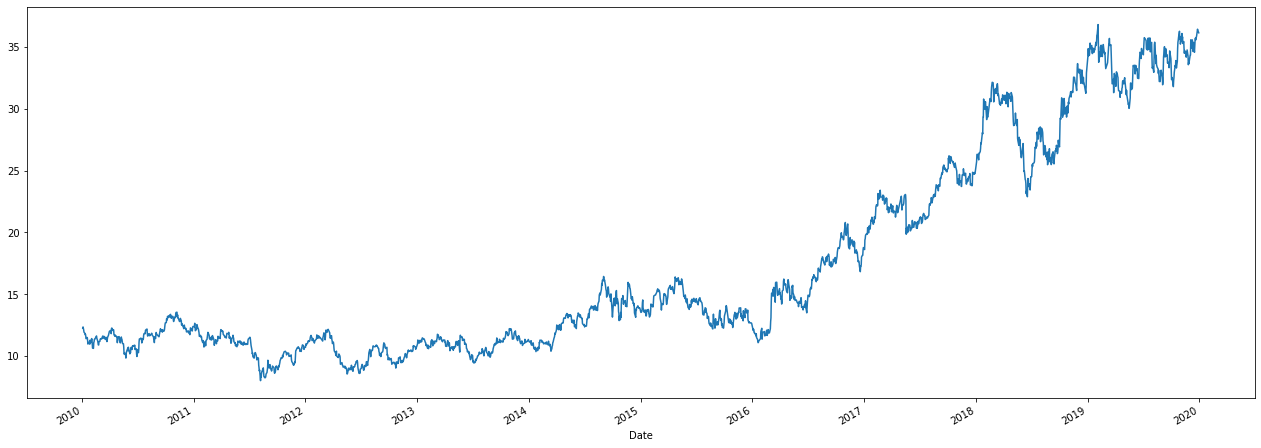

In [166]:
#Imprimindo o gráfico
df['Adj Close'].plot(figsize=(22,8));

In [167]:
model = Prophet()

In [168]:
df = df.reset_index()

In [169]:
df[['ds', 'y']] = df[['Date', 'Adj Close']]

In [170]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [171]:
future = model.make_future_dataframe(periods=720)

In [172]:
forecast = model.predict(future)

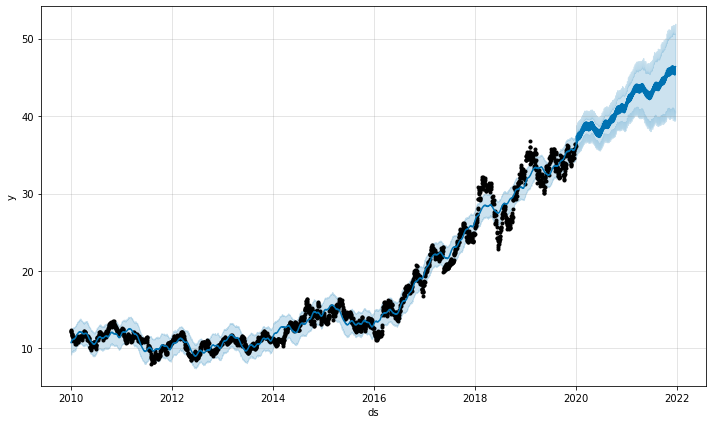

In [173]:
model.plot(forecast)
plt.show()

In [174]:
model_ret = Prophet()

In [175]:
df_ret = df_ret.reset_index()

In [176]:
#Usando para os retornos
#df_ret['Retornos'] = df_ret['Adj Close'].pct_change(1)

#MA15
#Usando para a Media de 15
df_ret['Retornos'] = df_ret['Adj Close'].rolling(15).mean()

In [177]:
df_ret[['ds', 'y']] = df_ret[['Date', 'Retornos']]

In [178]:
df_ret = df_ret.dropna()

In [179]:
model_ret.fit(df_ret)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [180]:
future = model_ret.make_future_dataframe(periods=720)

In [181]:
forecast = model_ret.predict(future)

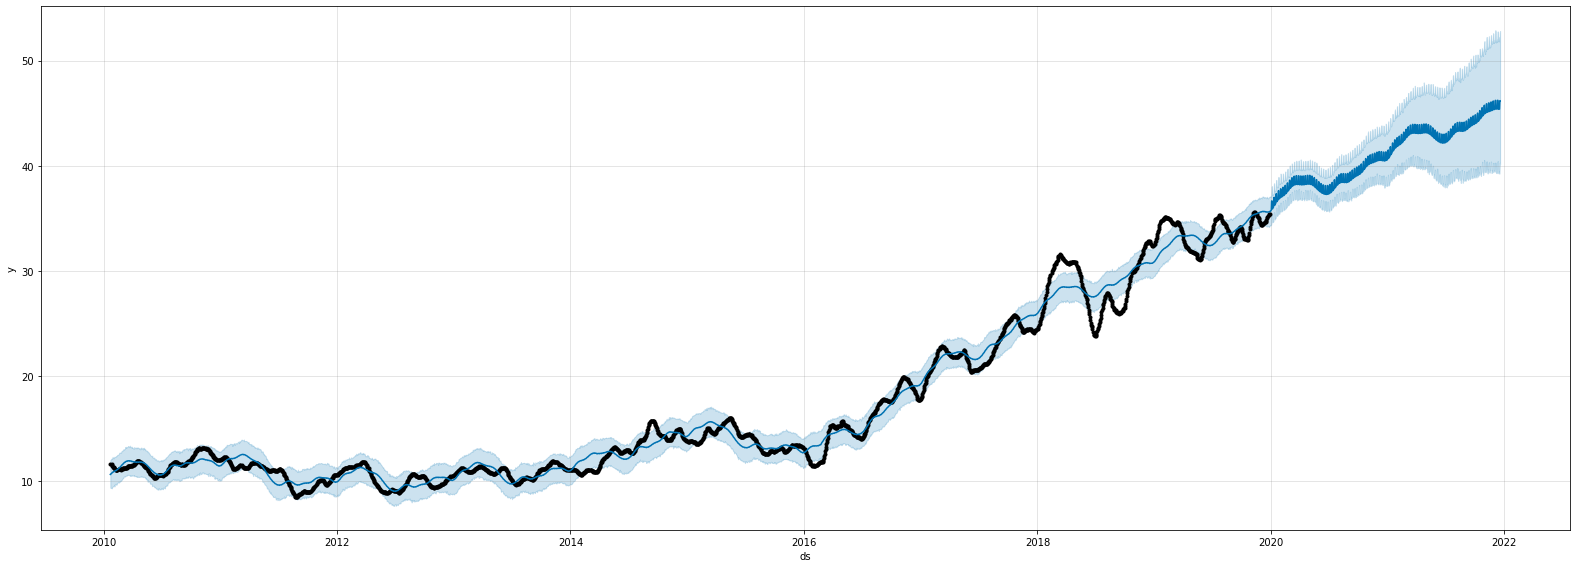

In [182]:
model_ret.plot(forecast, figsize=(22,8))
plt.show()

In [183]:
df_ret

,Date,Open,High,Low,Close,Adj Close,Volume,Retornos,ds,y
14,2010-01-22,16.141899,16.620001,16.110001,16.506201,11.079173,12513443,11.685110,2010-01-22,11.685110
15,2010-01-26,16.123699,16.615400,15.959800,16.547100,11.106626,11890615,11.608091,2010-01-26,11.608091
16,2010-01-27,16.501600,16.501600,16.114599,16.310400,10.947743,11139092,11.515182,2010-01-27,11.515182
17,2010-01-28,16.492500,16.797600,16.228399,16.797600,11.274761,12572520,11.451202,2010-01-28,11.451202
18,2010-01-29,16.902300,16.970600,16.346800,16.451500,11.042457,12451512,11.380089,2010-01-29,11.380089
...,...,...,...,...,...,...,...,...,...,...
2461,2019-12-20,36.630001,36.700001,36.299999,36.500000,35.566170,24863500,35.102265,2019-12-20,35.102265
2462,2019-12-23,36.500000,36.840000,36.310001,36.840000,35.897465,11691500,35.206023,2019-12-23,35.206023
2463,2019-12-26,36.799999,37.400002,36.650002,37.400002,36.443146,16333100,35.345511,2019-12-26,35.345511
2464,2019-12-27,37.500000,37.689999,36.910000,37.299999,36.345692,13455300,35.396089,2019-12-27,35.396089


In [184]:
forecast.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3165,2021-12-13,45.709679,39.384884,51.914962,39.896540,52.314468,-0.306489,-0.306489,-0.306489,-0.227987,-0.227987,-0.227987,-0.078501,-0.078501,-0.078501,0.0,0.0,0.0,45.403190
3166,2021-12-14,45.723036,39.275976,51.809868,39.897976,52.342714,-0.348811,-0.348811,-0.348811,-0.251208,-0.251208,-0.251208,-0.097603,-0.097603,-0.097603,0.0,0.0,0.0,45.374225
3167,2021-12-15,45.736393,39.462781,52.153362,39.898517,52.365584,-0.349574,-0.349574,-0.349574,-0.232300,-0.232300,-0.232300,-0.117274,-0.117274,-0.117274,0.0,0.0,0.0,45.386819
3168,2021-12-16,45.749751,39.265264,52.219882,39.899058,52.386017,-0.372845,-0.372845,-0.372845,-0.235607,-0.235607,-0.235607,-0.137238,-0.137238,-0.137238,0.0,0.0,0.0,45.376906
3169,2021-12-17,45.763108,39.258930,51.830980,39.899598,52.406006,-0.379675,-0.379675,-0.379675,-0.222479,-0.222479,-0.222479,-0.157196,-0.157196,-0.157196,0.0,0.0,0.0,45.383433
3170,2021-12-18,45.776466,40.289410,52.673599,39.900139,52.426108,0.407961,0.407961,0.407961,0.584790,0.584790,0.584790,-0.176830,-0.176830,-0.176830,0.0,0.0,0.0,46.184426
3171,2021-12-19,45.789823,40.136270,52.801264,39.900680,52.459583,0.388982,0.388982,0.388982,0.584790,0.584790,0.584790,-0.195808,-0.195808,-0.195808,0.0,0.0,0.0,46.178805


In [185]:
df_result = pd.DataFrame()

In [186]:
df_result['Real'] = df_ret['y']

In [187]:
df_result['Previsto'] = forecast['yhat']

In [188]:
df_result.tail(10)


,Real,Previsto
2456,34.609971,36.627277
2457,34.630261,36.666136
2458,34.732332,35.894972
2459,34.851312,35.915861
2460,34.988471,35.981080
2461,35.102265,36.025968
2462,35.206023,36.088832
2463,35.345511,36.947021
2464,35.396089,36.998758
2465,35.436919,36.238168


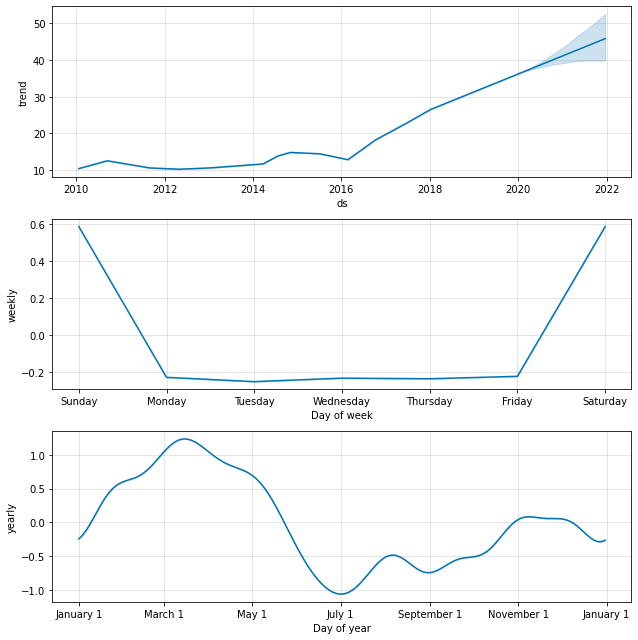

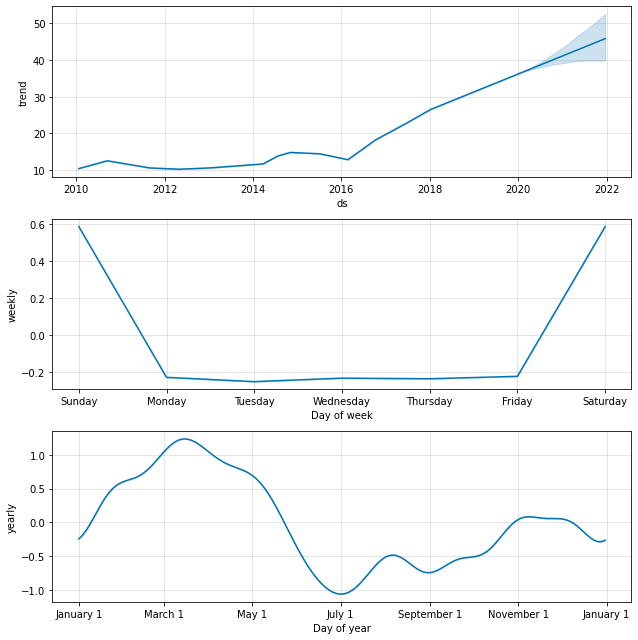

In [189]:
model_ret.plot_components(forecast)